In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [32]:
df = pd.read_csv(r"E:\Data_mites_projects\teaching assi\PRCP-1026-TeachingAssistance\Teaching Assistance\tae.csv")
df.head(5)

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [33]:
import pandas as pd

# Load the CSV file with headers
df = pd.read_csv(r"E:\Data_mites_projects\teaching assi\PRCP-1026-TeachingAssistance\Teaching Assistance\tae.csv", header=0)

# Rename columns to the desired headers
df.columns = ['English_speaker', 'Course_instructor', 'Course', 'Summer_or_regular_semester', 'Class_size', 'Class_attribute']

# Display the modified DataFrame
print(df)


     English_speaker  Course_instructor  Course  Summer_or_regular_semester  \
0                  2                 15       3                           1   
1                  1                 23       3                           2   
2                  1                  5       2                           2   
3                  2                  7      11                           2   
4                  2                 23       3                           1   
..               ...                ...     ...                         ...   
145                2                  3       2                           2   
146                2                 10       3                           2   
147                1                 18       7                           2   
148                2                 22       1                           2   
149                2                  2      10                           2   

     Class_size  Class_attribute  
0            17 

In [34]:
data=df

In [35]:
data.shape

(150, 6)

In [36]:
data.head(5)

,English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [37]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'English_speaker': [2 1]
Unique values in column 'Course_instructor': [15 23  5  7  9 10 22 13 18  6 25  2  1  8 14 21 11 16  4 17 20 12 24  3
 19]
Unique values in column 'Course': [ 3  2 11  5 22  1 21 17 25  7  9 15 13  8 16 19 14  6 12 18 23 26 24 20
  4 10]
Unique values in column 'Summer_or_regular_semester': [1 2]
Unique values in column 'Class_size': [17 49 33 55 20 19 27 58  9 30 29 39 42 43 10 46 23 31 22 37 13 24 38 28
 51 36 21 48 25 11 45 18 14 35 15 32 34 66 12  3  7 54 16 44  5 26]
Unique values in column 'Class_attribute': [3 2 1]


In [38]:
column = data.columns 
for i in column:
    print(data.dtypes[i])

int64
int64
int64
int64
int64
int64


In [39]:
for column in data.columns:
    missing_count = data[column].isnull().sum()
    print(f"{column} = {missing_count}")

English_speaker = 0
Course_instructor = 0
Course = 0
Summer_or_regular_semester = 0
Class_size = 0
Class_attribute = 0


In [40]:
data.describe

<bound method NDFrame.describe of      English_speaker  Course_instructor  Course  Summer_or_regular_semester  \
0                  2                 15       3                           1   
1                  1                 23       3                           2   
2                  1                  5       2                           2   
3                  2                  7      11                           2   
4                  2                 23       3                           1   
..               ...                ...     ...                         ...   
145                2                  3       2                           2   
146                2                 10       3                           2   
147                1                 18       7                           2   
148                2                 22       1                           2   
149                2                  2      10                           2   

     Class_size  

In [41]:
for column in data.select_dtypes(include=np.number):  # Select numerical columns
  skewness=stats.skew(data[column])
  kurtosis= stats.kurtosis(data[column])
  print(f'{column}=   skew = {skewness}\n kutosis = {kurtosis}')

English_speaker=   skew = -1.6083068904485138
 kutosis = 0.5866510538641658
Course_instructor=   skew = 0.0017262272691813717
 kutosis = -1.145524888974843
Course=   skew = 0.8512392369048062
 kutosis = -0.5417973381067189
Summer_or_regular_semester=   skew = -1.9975126578276838
 kutosis = 1.9900568181818166
Class_size=   skew = 0.48245861478461965
 kutosis = -0.38678834900915815
Class_attribute=   skew = -0.02449598587206156
 kutosis = -1.4991998933333412


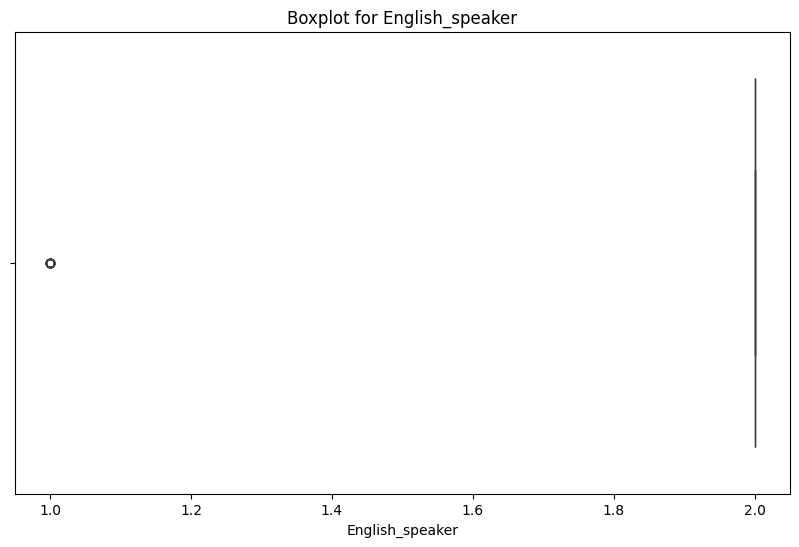

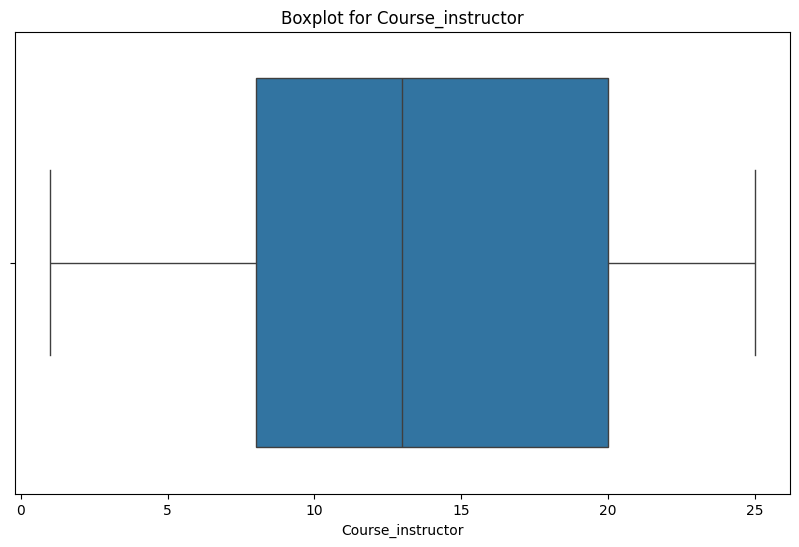

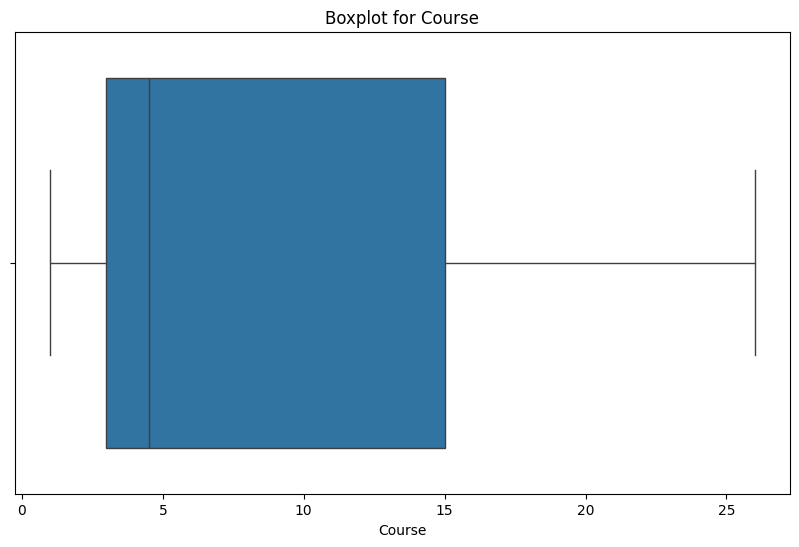

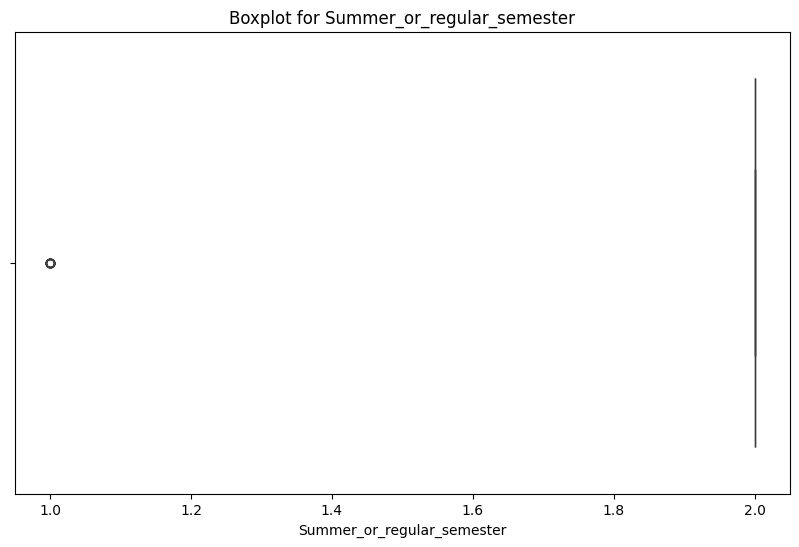

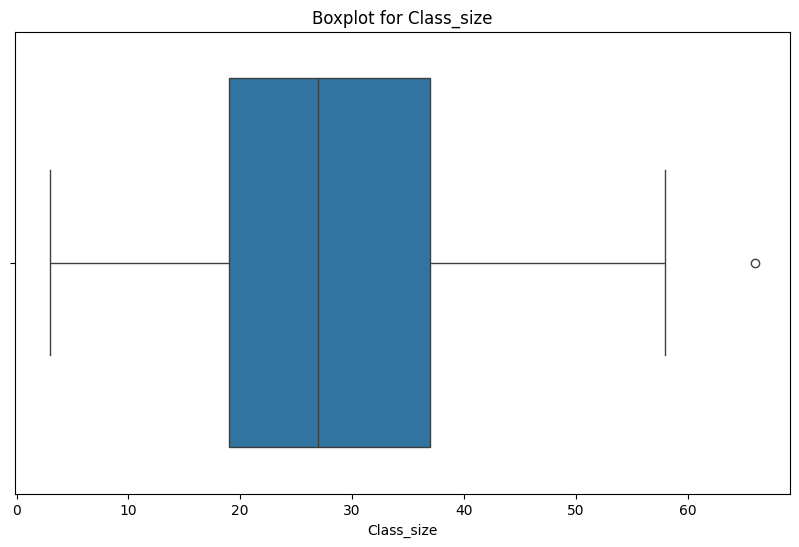

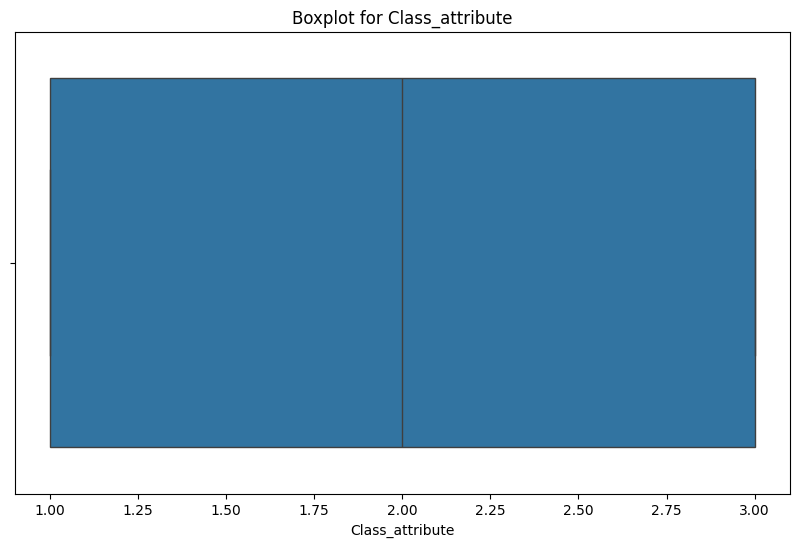

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()


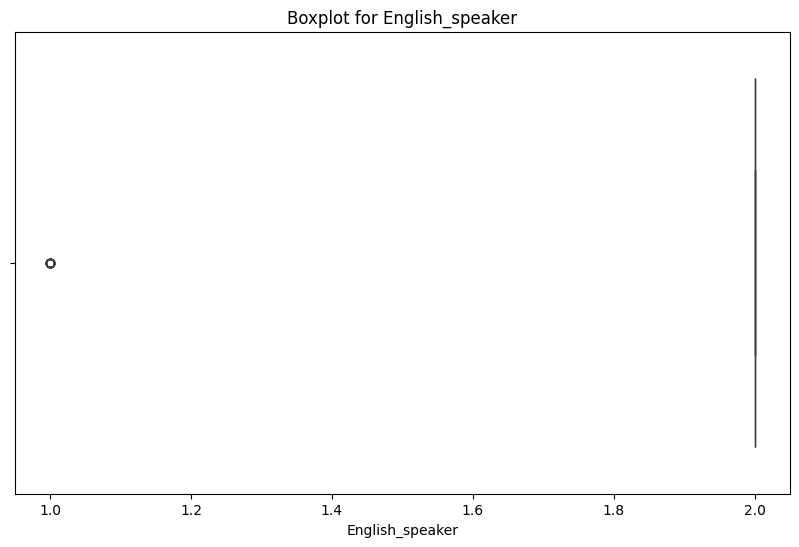

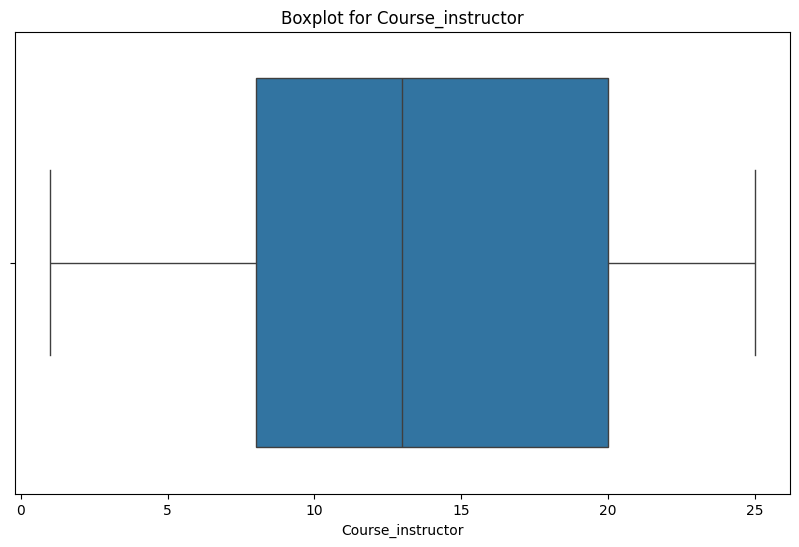

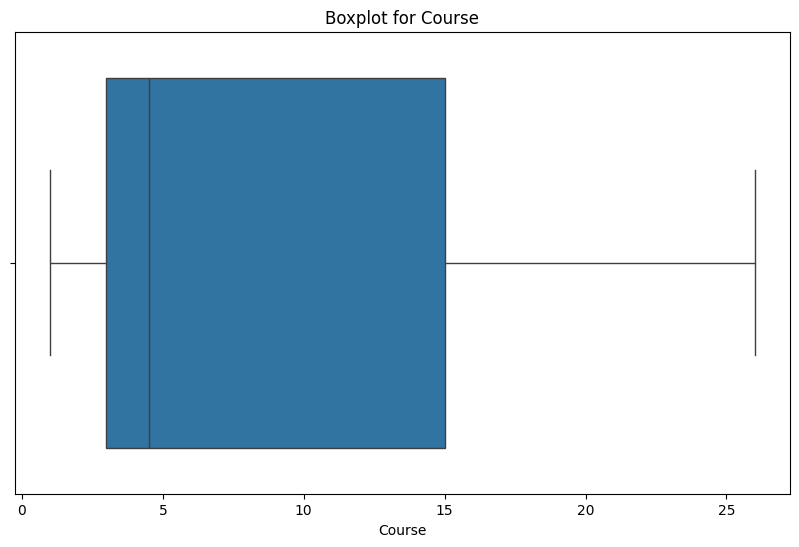

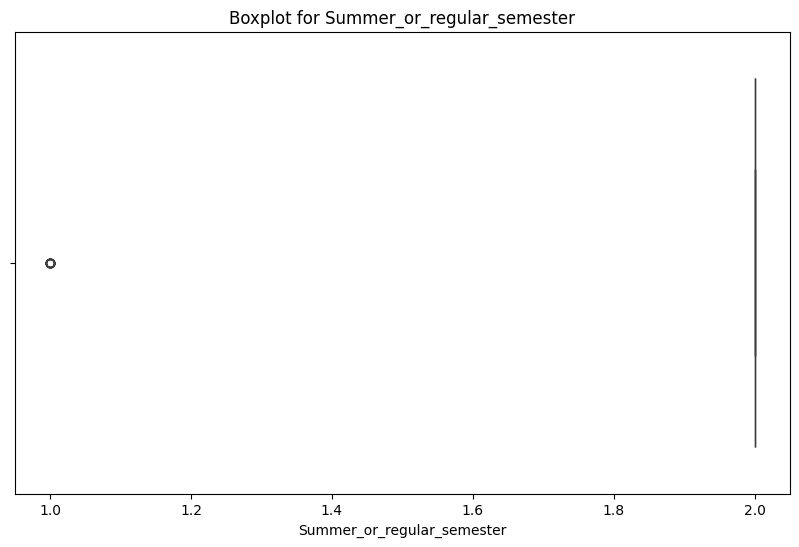

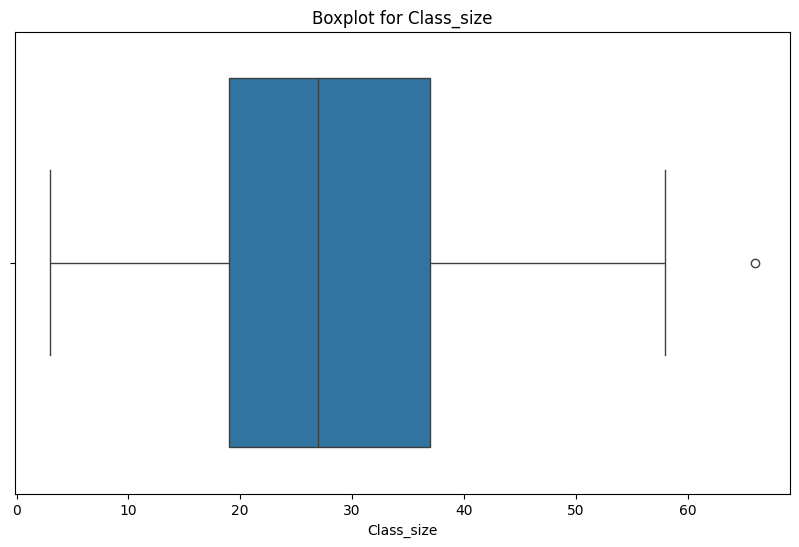

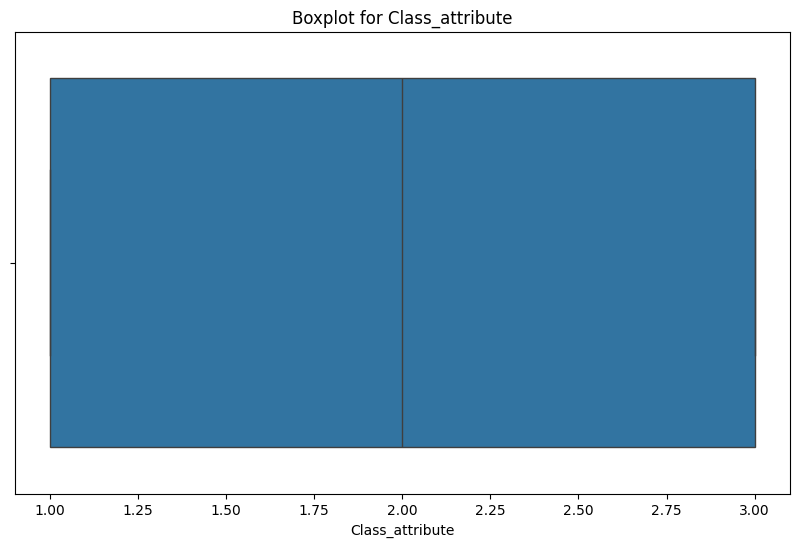

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Filter out columns with few unique values (likely categorical)
continuous_columns = [col for col in numeric_columns if data[col].nunique() > 1]

for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()


In [44]:
def detect_outliers_iqr(data):
    # Select only numeric columns to calculate IQR
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier detection thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).sum()
    return outliers
# Check for outliers in the Box-Cox transformed data
outliers_boxcox = detect_outliers_iqr(data)
print("Outliers using Box-Cox transformation:")
print(outliers_boxcox)

Outliers using Box-Cox transformation:
English_speaker               28
Course_instructor              0
Course                         0
Summer_or_regular_semester    22
Class_size                     1
Class_attribute                0
dtype: int64


In [45]:
print(data.columns)
print(data.head(5))

Index(['English_speaker', 'Course_instructor', 'Course',
       'Summer_or_regular_semester', 'Class_size', 'Class_attribute'],
      dtype='object')
   English_speaker  Course_instructor  Course  Summer_or_regular_semester  \
0                2                 15       3                           1   
1                1                 23       3                           2   
2                1                  5       2                           2   
3                2                  7      11                           2   
4                2                 23       3                           1   

   Class_size  Class_attribute  
0          17                3  
1          49                3  
2          33                3  
3          55                3  
4          20                3  


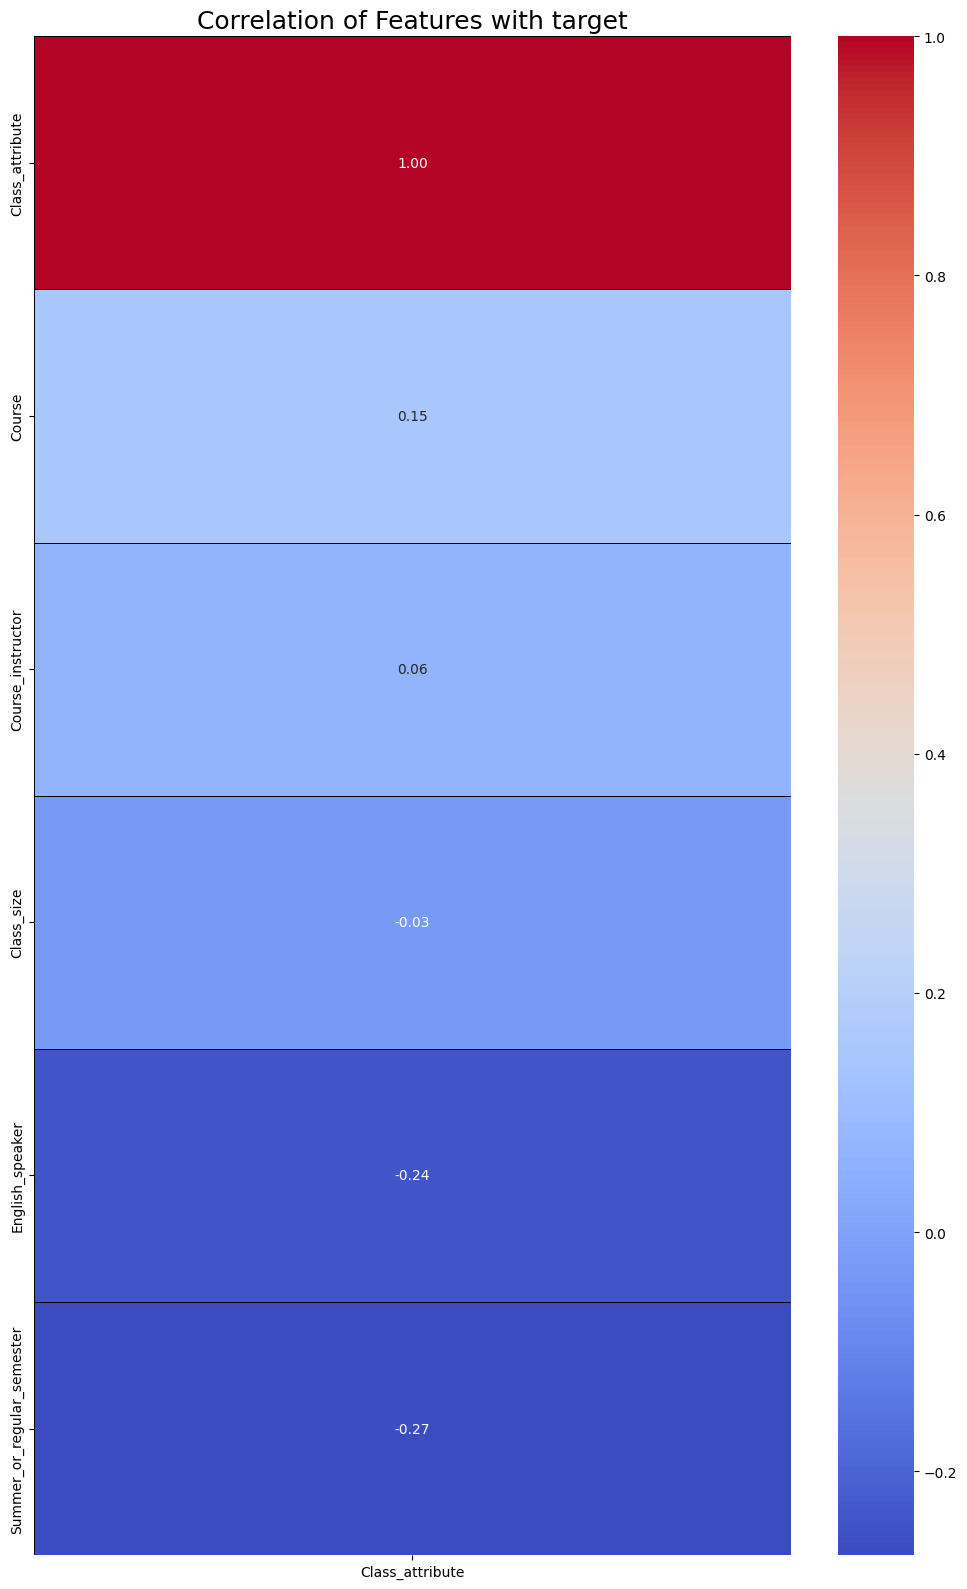

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming you already imported seaborn

#Calculate the correlation matrix with respect to target
correlation_matrix = df.corr()

# Visualize the correlation matrix with target
plt.figure(figsize=(10, 16))

# Create a heatmap for features correlated with target
sns.heatmap(correlation_matrix[['Class_attribute']].sort_values(by='Class_attribute', ascending=False), 
            annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')

# Set title
plt.title('Correlation of Features with target', fontsize=18)

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Feature set and target variable
X = df[["Course_instructor", "Course"]]
y = df["Class_attribute"]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1),
    "Logistic Regression": LogisticRegression(max_iter=200, n_jobs=-1),
    "XGBoost": XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.1, n_jobs=-1, num_classes=len(le.classes_)),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=5)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.5333
Logistic Regression Accuracy: 0.4000


c:\Users\user\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [21:25:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5000
Gradient Boosting Accuracy: 0.5000


In [48]:
# Let's define a function to remove outliers using the IQR method.
# Outliers are defined as points outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].

# Create a copy of the original dataset for outlier removal
df_cleaned = df.copy()

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers on numeric columns
df_cleaned = remove_outliers_iqr(df_cleaned, numeric_columns)

# Display the shape of the cleaned dataset to verify the changes
df_cleaned.shape


(107, 6)

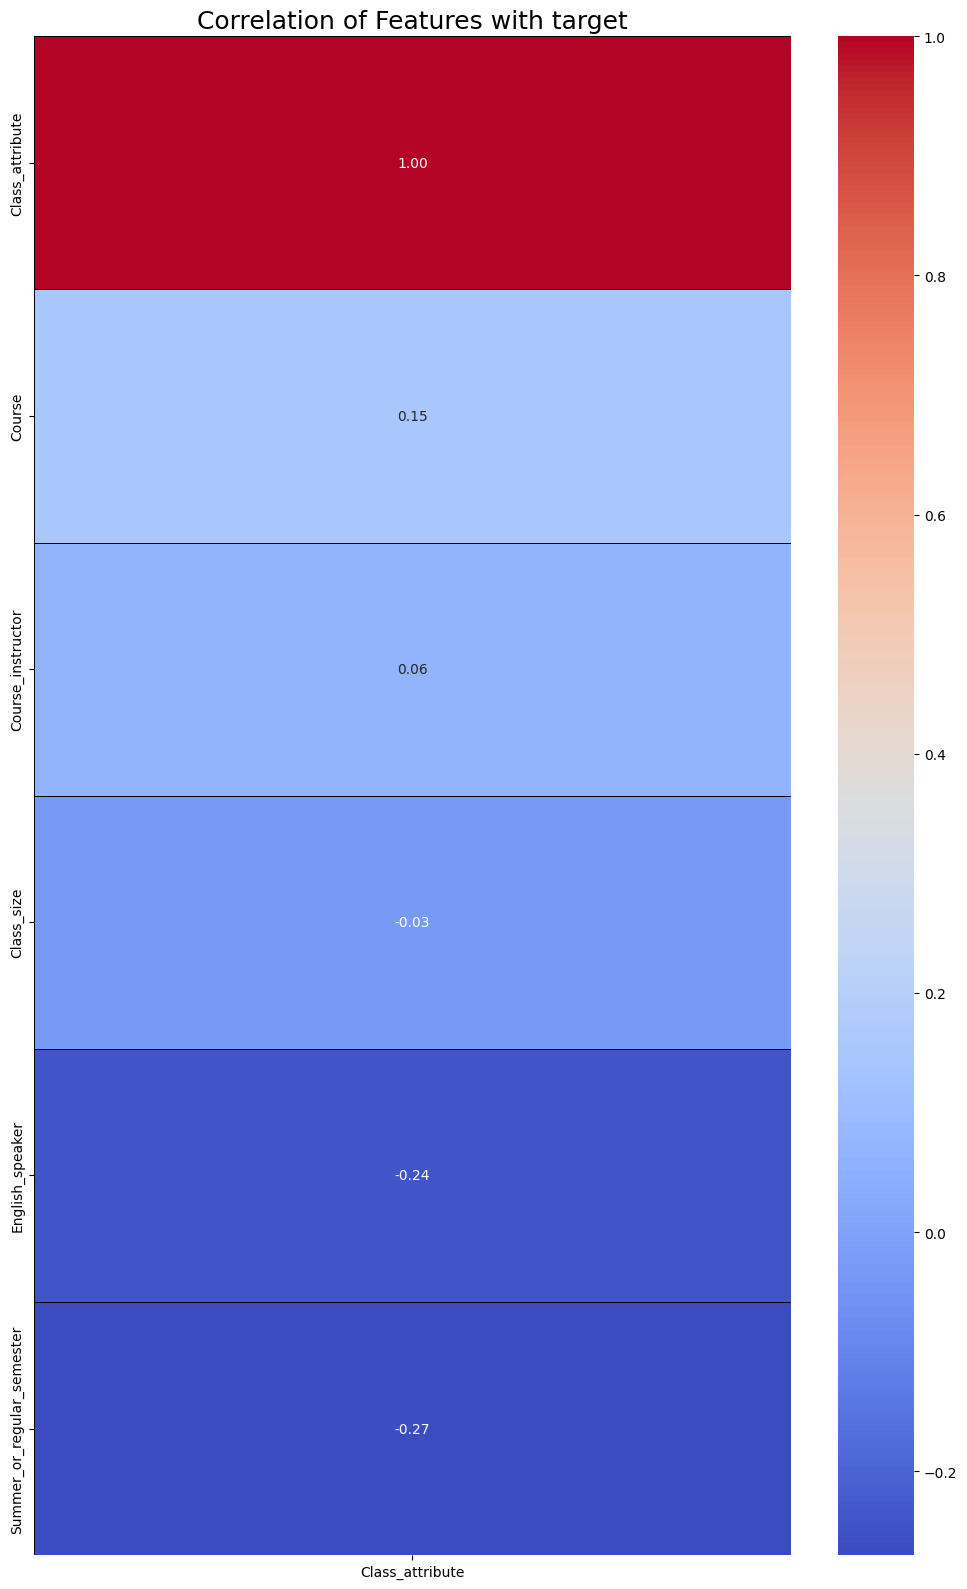

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming you already imported seaborn

#Calculate the correlation matrix with respect to target
correlation_matrix = df.corr()

# Visualize the correlation matrix with target
plt.figure(figsize=(10, 16))

# Create a heatmap for features correlated with target
sns.heatmap(correlation_matrix[['Class_attribute']].sort_values(by='Class_attribute', ascending=False), 
            annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')

# Set title
plt.title('Correlation of Features with target', fontsize=18)

# Show the plot
plt.tight_layout()
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Feature set and target variable
X = df[["Course_instructor", "Course"]]
y = df["Class_attribute"]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1),
    "Logistic Regression": LogisticRegression(max_iter=200, n_jobs=-1),
    "XGBoost": XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.1, n_jobs=-1, num_classes=len(le.classes_)),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=5)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    

Random Forest Accuracy: 0.5000
Logistic Regression Accuracy: 0.4000
XGBoost Accuracy: 0.5000


c:\Users\user\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [21:25:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.5000


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Load the dataset (adjust the file path as needed)

df.columns = ['English_speaker', 'Course_instructor', 'Course', 
              'Summer_or_regular_semester', 'Class_size', 'Class_attribute']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df["Class_attribute"])

# Define feature columns
X = df[['English_speaker', 'Course_instructor', 'Course', 
        'Summer_or_regular_semester', 'Class_size']]

# Set up a ColumnTransformer to handle categorical encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Course_instructor', 'Class_size']),
        ('cat', OneHotEncoder(), ['English_speaker', 'Course', 'Summer_or_regular_semester'])
    ])

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(preprocessor.fit_transform(X), y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Define the model (Random Forest) with GridSearch for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Random Forest Model Parameters: {grid_search.best_params_}")
print(f"Random Forest Model Accuracy: {accuracy:.4f}")


Best Random Forest Model Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Model Accuracy: 0.5484


In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y_resampled are your feature and target variables

# Create polynomial features and interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Impute missing values in X_poly
imputer = SimpleImputer(strategy='median')
X_poly_imputed = imputer.fit_transform(X_poly)

# Ensure X_poly and y_resampled have the same number of rows
def filter_or_drop_rows(X, y):
    if X.shape[0] > y.shape[0]:
        X = X[:y.shape[0]]
    elif X.shape[0] < y.shape[0]:
        y = y[:X.shape[0]]
    return X, y

X_poly_imputed, y_resampled = filter_or_drop_rows(X_poly_imputed, y_resampled)

# Split the enhanced data
X_train, X_test, y_train, y_test = train_test_split(X_poly_imputed, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define individual models
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
svm = make_pipeline(StandardScaler(), SVC(probability=True))
log_reg = LogisticRegression(max_iter=200)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('svm', svm), ('log_reg', log_reg)], voting='soft')

# Hyperparameter tuning (Optional)
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [5, 10, 15],
    'svm__svc__C': [0.1, 1, 10],
    'svm__svc__kernel': ['linear', 'rbf'],
    'log_reg__C': [0.1, 1, 10]
}

random_search = RandomizedSearchCV(voting_clf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")


c:\Users\user\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Voting Classifier Accuracy: 0.5333


c:\Users\user\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# Increase max_iter for Logistic Regression and apply scaling to the entire dataset
from sklearn.preprocessing import StandardScaler

# Scaling the polynomial features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly_imputed)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Update max_iter and solver in Logistic Regression
log_reg = LogisticRegression(max_iter=500, solver='lbfgs')

# Voting Classifier with updated Logistic Regression
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('svm', svm), ('log_reg', log_reg)], voting='soft')

# Run RandomizedSearchCV as before
random_search = RandomizedSearchCV(voting_clf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")


Voting Classifier Accuracy: 0.6000


In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming X is your input features DataFrame

# Step 1: Define transformations
# Polynomial features for numeric data
poly_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Log transformation for skewed numerical features
log_transformer = FunctionTransformer(np.log1p, validate=True)  # log1p is log(1+x)

# Scaling for numerical data
scaler = StandardScaler()

# One-hot encoding for categorical data
categorical_encoder = OneHotEncoder(drop='first', sparse=False)

# Step 2: Identify numerical and categorical columns
# Adjust this based on your dataset
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Create a ColumnTransformer to handle different types of data
preprocessor = ColumnTransformer(
    transformers=[
        ('num_poly', poly_features, numeric_features),
        ('num_log', log_transformer, numeric_features),
        ('num_scale', scaler, numeric_features),
        
    ],
    remainder='drop'  # drop any columns not specified in transformers
)

# Step 4: Pipeline with PCA (optional) to reduce dimensionality after feature engineering
pca = PCA(n_components=0.95)  # Retain 95% of variance

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca)  # Apply PCA only if needed for high-dimensional data
])

# Step 5: Apply feature engineering to X and transform it
X_eng = pipeline.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_eng, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 6: Define Voting Classifier with the improved feature set
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('svm', svm), ('log_reg', log_reg)], voting='soft')

# Fit the model and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy after Feature Engineering: {accuracy:.4f}")


TypeError: __init__() got an unexpected keyword argument 'sparse'

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming X is your input features DataFrame

# Step 1: Define transformations
# Polynomial features for numeric data
poly_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Log transformation for skewed numerical features
log_transformer = FunctionTransformer(np.log1p, validate=True)  # log1p is log(1+x)

# Scaling for numerical data
scaler = StandardScaler()

# One-hot encoding for categorical data
categorical_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Step 2: Identify numerical and categorical columns
# Adjust this based on your dataset
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Step 3: Create a ColumnTransformer to handle different types of data
preprocessor = ColumnTransformer(
    transformers=[
        ('num_poly', poly_features, numeric_features),
        ('num_log', log_transformer, numeric_features),
        ('num_scale', scaler, numeric_features),
        ('cat', categorical_encoder, categorical_features)
    ],
    remainder='drop'  # drop any columns not specified in transformers
)

# Step 4: Pipeline with PCA (optional) to reduce dimensionality after feature engineering
pca = PCA(n_components=0.95)  # Retain 95% of variance

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca)  # Apply PCA only if needed for high-dimensional data
])

# Step 5: Apply feature engineering to X and transform it
X_eng = pipeline.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_eng, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 6: Define Voting Classifier with the improved feature set
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('svm', svm), ('log_reg', log_reg)], voting='soft')

# Fit the model and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy after Feature Engineering: {accuracy:.4f}")


Voting Classifier Accuracy after Feature Engineering: 0.6000


In [63]:
!pip install category_encoders


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.9 MB 14.9 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 12.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.9 MB 10.4 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.9 MB 9.6 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 7.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
!pip show category_encoders


Name: category-encoders
Version: 2.6.4
Summary: A collection of sklearn transformers to encode categorical variables as numeric
Home-page: https://github.com/scikit-learn-contrib/category_encoders
Author: Will McGinnis
Author-email: will@pedalwrencher.com
License: BSD
Location: c:\users\user\python39\lib\site-packages
Requires: numpy, pandas, patsy, scikit-learn, scipy, statsmodels
Required-by: 


In [66]:
import sys
print(sys.version)


3.9.0 (tags/v3.9.0:9cf6752, Oct  5 2020, 15:34:40) [MSC v.1927 64 bit (AMD64)]


In [67]:
import sys
print(sys.executable)


c:\Users\user\Python39\python.exe


In [68]:
import category_encoders as ce
print(ce.__version__)


2.6.4


In [71]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# Target Encoding
from category_encoders import TargetEncoder

# Assuming X is your feature DataFrame and y is your target variable
categorical_features = X.select_dtypes(include=['object']).columns
target_encoder = TargetEncoder(cols=categorical_features)
X[categorical_features] = target_encoder.fit_transform(X[categorical_features], y)

# Step 1: Define transformations
# Polynomial features for numeric data
poly_features = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)

# Scaling (using StandardScaler instead of MinMaxScaler)
scaler = StandardScaler()

# Step 2: Identify numerical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_poly', poly_features, numeric_features),
        ('num_scale', scaler, numeric_features),
    ],
    remainder='passthrough'  # Keep all columns, including encoded categorical ones
)

# Step 4: Pipeline with TruncatedSVD (dimensionality reduction for sparse data)
# Dynamically set n_components based on the number of features after transformation
n_components = min(50, X.shape[1])  # Choose the smaller value between 50 and number of features
svd = TruncatedSVD(n_components=n_components)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svd', svd)  # Use SVD if dimensionality is too high
])

# Step 5: Apply feature engineering to X and transform it
X_eng = pipeline.fit_transform(X)

# Step 6: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_eng, y, test_size=0.2, random_state=42, stratify=y)

# Define individual models
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
svm = SVC(probability=True)
log_reg = LogisticRegression(solver='saga', max_iter=500)  # Using 'saga' solver and increased iterations

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('svm', svm), ('log_reg', log_reg)], voting='soft')

# Step 7: Fit the model and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy after Advanced Feature Engineering: {accuracy:.4f}")


Voting Classifier Accuracy after Advanced Feature Engineering: 0.5333


c:\Users\user\Python39\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
